In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


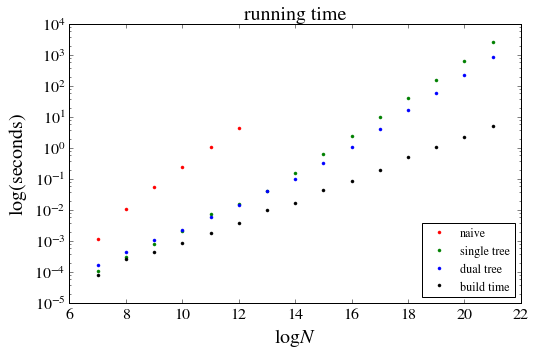

In [2]:
arr = np.genfromtxt('saved/test_kde5_0p001.csv')
fig = plt.figure(figsize=(5*1.618, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(arr[0:6,0], arr[0:6,2], 'r.', label='naive');
ax.plot(arr[:,0], arr[:,3], 'g.', label='single tree'); ax.set_yscale('log');
ax.plot(arr[:,0], arr[:,4], 'b.', label='dual tree');
ax.plot(arr[:,0], arr[:,1], 'k.', label='build time');
ax.set_title('running time', fontsize=20)
ax.set_xlabel(r'$\log N$', fontsize=20)
ax.set_ylabel(r'$\log$(seconds)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(loc=4, numpoints=1);